<a href="https://colab.research.google.com/github/edisonc57/neftepromyslovyye-zhidkosti-s-ispol-zovaniyem-Python/blob/main/%D0%9E%D0%B1%D1%8A%D0%B5%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B3%D0%B0%D0%B7%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 215  415  615  815 1015 1215 1415 1615 1815 2015]
[0.016654 0.008141 0.005371 0.003956 0.003114 0.002544 0.002149 0.001857
 0.00163  0.001459]
[0.0126 0.0129 0.0132 0.0135 0.0138 0.0143 0.0147 0.0152 0.0156 0.0161]
[-8.77012869e-12  3.69160994e-08 -5.07130583e-05  2.49932523e-02]


Text(0.5, 1.0, 'p vs Bg')

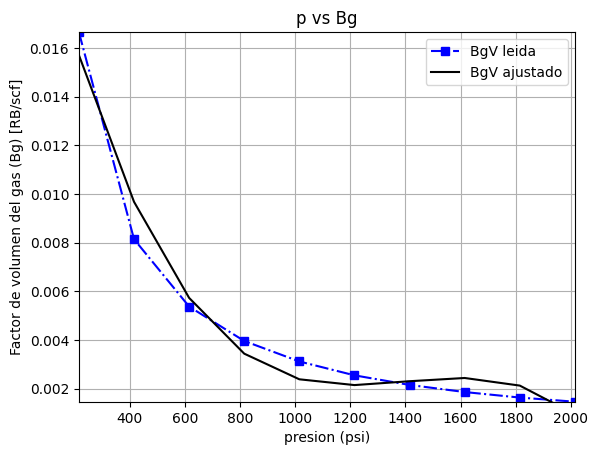

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 25 10:47:14 2023

@author: Edison
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

datos=  pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datos_01.xlsx", sheet_name= "Hoja1")
press= np.array (datos["Presión [psia]"])
BgV= np.array(datos["Bg [RB/scf]"])
Mugv= np.array(datos["Mug [cp]"])
print(press)
print(BgV)
print(Mugv)

def fit_fuction(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d

p_adjust, p_cov= curve_fit(fit_fuction, press, BgV)
print(p_adjust)

R2= np.corrcoef(BgV, fit_fuction(press,*p_adjust)) [0,1]

plt.figure("Datos BgV")
plt.plot(press, BgV, '-.bs', label= 'BgV leida')
plt.plot(press, fit_fuction(press,*p_adjust), '-k', label= 'BgV ajustado' )
plt.xlim((np.min(press), np.max(press)))
plt.ylim((np.min(BgV),np.max(BgV)))
plt.xlabel('presion (psi)')
plt.ylabel('Factor de volumen del gas (Bg) [RB/scf]')
plt.legend(loc=0)
plt.grid()
plt.title('p vs Bg')



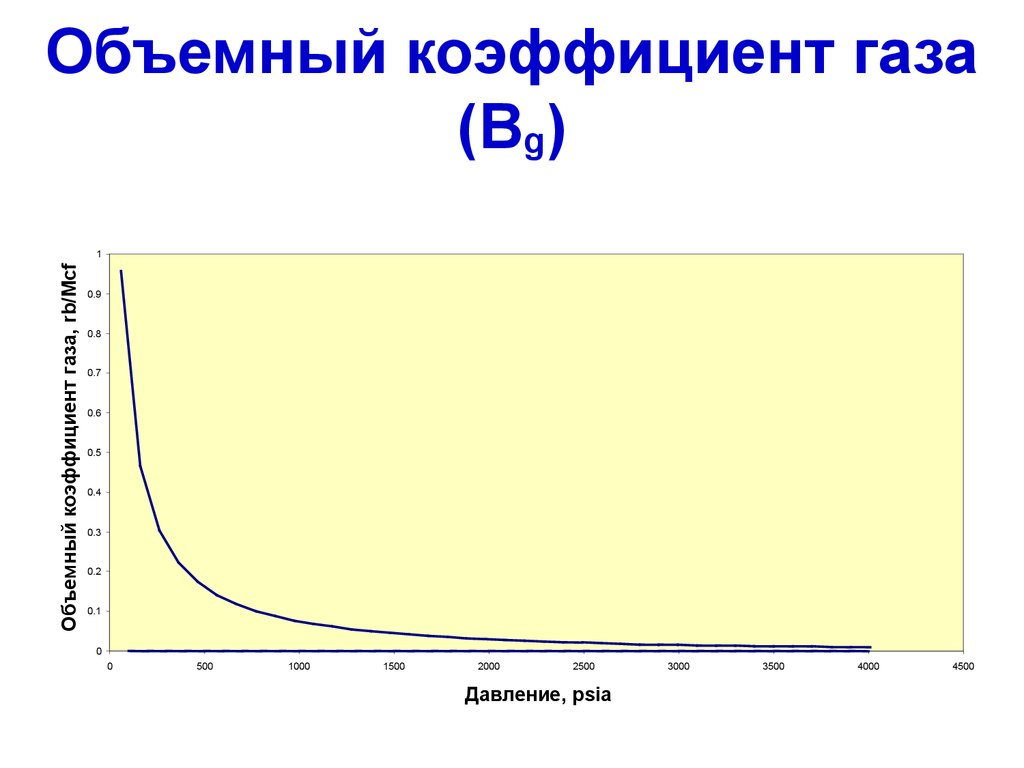